# Exploración del Dataset – Diagnóstico de Endometriosis
Autor: Guillermo Cárcamo  
Materia: Aprendizaje Automático – 2025  
Segunda Entrega: Descripción y Análisis Inicial del Dataset


# Importacion y lectura del dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Ruta al dataset
DATA_PATH = Path("../data/raw/structured_endometriosis_data.csv")

# Carga de datos
df = pd.read_csv(DATA_PATH)
print("Dataset cargado correctamente")
print("Forma del DataFrame:", df.shape)
df.head(3)

Dataset cargado correctamente
Forma del DataFrame: (10000, 7)


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0


# Descripción general del dataset

In [5]:
# Número de filas e instancias
n_filas, n_columnas = df.shape
print(f"Cantidad de instancias: {n_filas}")
print(f"Cantidad de características: {n_columnas}")

# Tipos de datos y no nulos
df.info()


Cantidad de instancias: 10000
Cantidad de características: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB


# Resumen estadístico y estructura

In [6]:
# Resumen numérico (solo columnas numéricas)
display(df.describe())

# Si hay variables categóricas, ver valores únicos
cat_cols = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
for col in cat_cols:
    print(f"\n{col}: {df[col].nunique()} valores únicos → {df[col].unique()[:10]}")


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


# Verificación de datos faltantes y duplicados

In [7]:
print("Valores nulos por columna:")
print(df.isna().sum())

print("\nFilas duplicadas:", df.duplicated().sum())


Valores nulos por columna:
Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64

Filas duplicadas: 0


# Distribución de la variable objetivo

In [8]:
if "Diagnosis" in df.columns:
    conteo = df["Diagnosis"].value_counts()
    porcentaje = (conteo / len(df) * 100).round(2)
    print("Distribución de Diagnosis (0=No Endometriosis, 1=Endometriosis):")
    display(pd.DataFrame({"Frecuencia": conteo, "%": porcentaje}))


Distribución de Diagnosis (0=No Endometriosis, 1=Endometriosis):


,Frecuencia,%
Diagnosis,,
0,5921,59.21
1,4079,40.79


# Distribución de edades (histograma + densidad)

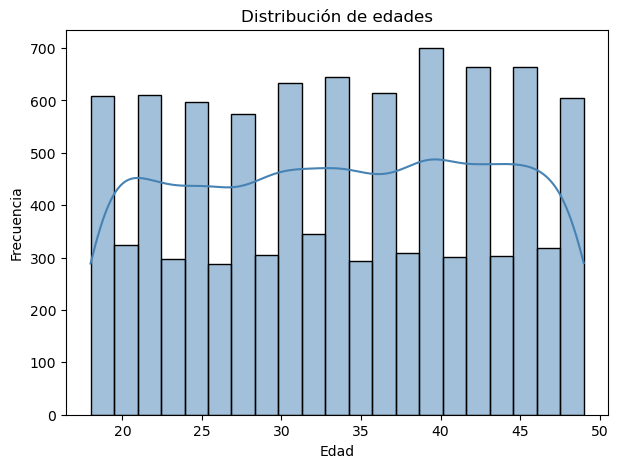

In [9]:
plt.figure(figsize=(7,5))
sns.histplot(df['Age'], kde=True, color='steelblue')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


# Tabla de frecuencias

In [12]:
# Tabla de frecuencias entre Diagnosis y Hormone_Level_Abnormality
tabla_frecuencias = pd.crosstab(df['Diagnosis'], df['Hormone_Level_Abnormality'])

print("Tabla de frecuencias absolutas:")
display(tabla_frecuencias)

# Tabla de frecuencias relativas (% dentro de cada diagnóstico)
tabla_porcentajes = pd.crosstab(
    df['Diagnosis'], 
    df['Hormone_Level_Abnormality'], 
    normalize='index'
) * 100
print("-------------------------------------------------------------")
print("Tabla de frecuencias relativas (%):")
display(tabla_porcentajes.round(2))


Tabla de frecuencias absolutas:


Hormone_Level_Abnormality,0,1
Diagnosis,,
0,2873,3048
1,1216,2863


-------------------------------------------------------------
Tabla de frecuencias relativas (%):


Hormone_Level_Abnormality,0,1
Diagnosis,,
0,48.52,51.48
1,29.81,70.19


# Mapa de calor de correlaciones numéricas

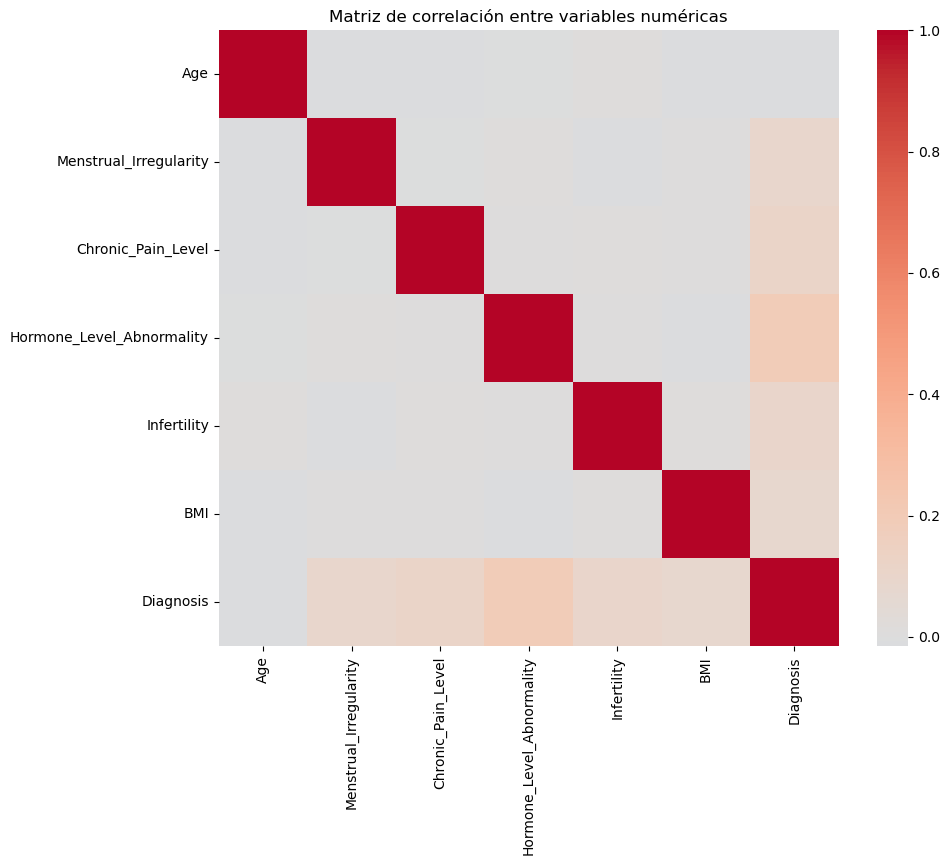

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

### Conclusiones del análisis exploratorio

- La variable **Age** presenta una distribución concentrada en adultos jóvenes, con pocos valores extremos.  
- Se observa una posible relación entre el nivel hormonal anormal y la presencia de diagnóstico positivo.  
- El mapa de correlaciones sugiere que algunas variables clínicas están moderadamente asociadas, lo que justifica aplicar **PCA** como técnica exploratoria en el siguiente notebook.


# Descripción general del dataset

El dataset **“structured_endometriosis_data.csv”** contiene 10.000 registros sintéticos de pacientes con y sin diagnóstico de endometriosis.

Cada fila representa un conjunto de variables clínicas asociadas a la condición.

- **Cantidad de instancias:** 10 000

- **Cantidad de características:** 

- **Variable objetivo:** Diagnosis → indica si la paciente presenta endometriosis (1) o no (0).

- **Principales variables predictoras:**

    -    **Age:** edad de la paciente (años)

    -    **BMI:** índice de masa corporal

    -    **Pain_Level:** nivel de dolor reportado (1–10)

    -    **Menstrual_Irregularity:** irregularidad en el ciclo menstrual (0/1)

    -    **Hormonal_Imbalance:** desequilibrio hormonal detectado (0/1)

    -    **Infertility:** presencia de infertilidad (0/1)

    -    **Pelvic_Pain:** dolor pélvico crónico (0/1)

    -    (…y otras variables relacionadas con síntomas clínicos)


**Procesamiento previo:**

No se realizaron modificaciones estructurales.

Se verificó integridad (sin duplicados ni nulos).

Se mantuvo el formato .csv original para trazabilidad.

# Conclusión

El dataset presenta una estructura limpia, balanceada y adecuada para tareas de clasificación binaria supervisada, donde la variable **Diagnosis** será la variable objetivo.